# CEvNS Examples

Examples for using the `CEvNS` code. 

In [3]:
%matplotlib inline
import numpy as np
import matplotlib as mpl
#matplotlib.use('Agg')
import matplotlib.pyplot as pl

#Change default font size so you don't need a magnifying glass
mpl.rc('font', **{'size'   : 12})

Import the CEvNS module

In [4]:
import CEvNS
#help(CEvNS.xsec_CEvNS)

### Differential Cross Sections

Calculate and plot the differential cross-section for a fixed neutrino energy (3 MeV) and a few New Physics models, involving new vector and scalar mediators

Max. Ge recoil energy (E_nu = 3 MeV):  0.26468447405  keV


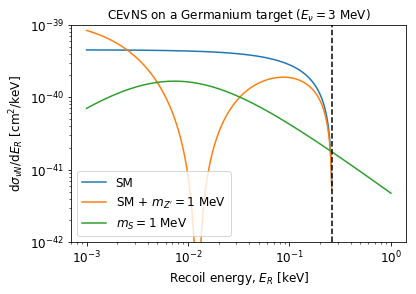

In [5]:
#Specify a single neutrino energy
E_nu = 3 #MeV

#Specify a nucleus - Germanium
A_Ge = 73
Z_Ge = 32

#Calculate differential xsec
E_R = np.logspace(-3,0,500)
dsigdE = CEvNS.xsec_CEvNS(E_R, E_nu, A_Ge, Z_Ge)

#Specify New Physics parameters - Z'
m_V = 1.0 #Mediator mass, 1 MeV
gsq_V = (2e-6)**2 #(g^V_q)*(g^L_nu)

#Specify New Physics parameters - S
m_S = 1e0 #Mediator mass, 1 MeV
gsq_S = (1.5e-6)**2 #(g^S_q)*(g^S_nu)

#Calculate differential xsec including New Physics
dsigdE_vector = CEvNS.xsec_CEvNS(E_R, E_nu, A_Ge, Z_Ge, \
                             gsq_V, m_V)

dsigdE_scalar = CEvNS.xsec_scalar(E_R, E_nu, A_Ge, Z_Ge, \
                             gsq_S, m_S)

#Maximum recoil energy
Emax = CEvNS.ERmax(E_nu, A_Ge)
print "Max. Ge recoil energy (E_nu = 3 MeV): ", Emax, " keV"

#Do some plotting 
pl.figure()
pl.loglog(E_R, dsigdE, label="SM")
pl.loglog(E_R, dsigdE_vector, label=r"SM + $m_{Z'} = 1\,\, \mathrm{MeV}$")
pl.loglog(E_R, dsigdE_scalar, label=r"$m_{S} = 1\,\, \mathrm{MeV}$")

pl.axvline(Emax, color='k', linestyle='--')

pl.ylim(1e-42, 1e-39)

pl.legend(fontsize=12.0, loc="best")

pl.title(r"CEvNS on a Germanium target $(E_\nu = 3 \,\,\mathrm{MeV})$", fontsize=12)
pl.xlabel(r"Recoil energy, $E_R$ [keV]")
pl.ylabel(r"$\mathrm{d}\sigma_{\nu N}/\mathrm{d}E_R$ [cm$^2$/keV]")
pl.show()


### Recoil Rates

Calculate the recoil rate in a Germanium target, assuming a neutrino flux from the Chooz reactor.

First, let's load the neutrino flux (need to choose `source="CHOOZ"` or `source="SNS"`):

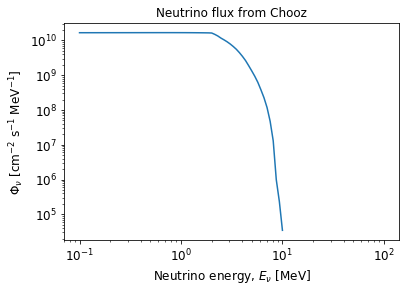

In [6]:
#Initialise neutrino_flux interpolation function, using default settings
CEvNS.loadNeutrinoFlux(source="CHOOZ")

#Plot neutrino flux
E_nu = np.logspace(-1, 2,100)

pl.figure()
pl.loglog(E_nu, CEvNS.neutrino_flux_tot(E_nu))

pl.title(r"Neutrino flux from Chooz", fontsize=12)
pl.xlabel(r"Neutrino energy, $E_\nu$ [MeV]")
pl.ylabel(r"$\Phi_\nu$ [cm$^{-2}$ s$^{-1}$ MeV$^{-1}$]")
pl.show()

Now we calculate (and plot) a whole bunch of recoil rates.

Choose which rates to plot by specifying `SM`, `magnetic`, `scalar`, `vector` in `interactions`:

In [7]:
interactions = ["SM", "scalar"]

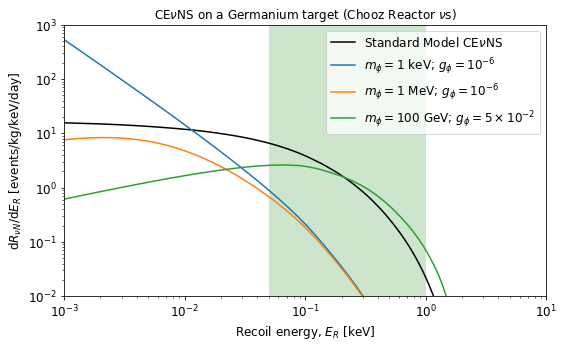

In [8]:
#Specify a nucleus - Germanium
A_Ge = 73
Z_Ge = 32

weight = 1.0

#Calculate differential rate
E_R = np.logspace(-3,2,500)

#Vectorize the differentialRate functions
diffRate_CEvNS = np.vectorize(CEvNS.differentialRate_CEvNS) #Vector exchange
diffRate_mag = np.vectorize(CEvNS.differentialRate_magnetic)   #Magnetic dipole
diffRate_scalar = np.vectorize(CEvNS.differentialRate_scalar)   #Scalar exchange


#Do some plotting
pl.figure(figsize=(8,5))

pl.fill_between(np.linspace(0.05,1), 1e-2, 1e3, alpha=0.2, facecolor='green')


if ("SM" in interactions):
    pl.loglog(E_R, diffRate_CEvNS(E_R, A_Ge, Z_Ge),'k',label=r"Standard Model CE$\nu$NS")

if ("magnetic" in interactions):
    pl.loglog(E_R, diffRate_mag(E_R, A_Ge, Z_Ge, 2.2e-12), label=r"$\mu_\nu = 2.2\times10^{-12}\,\mu_B$")
    pl.loglog(E_R, diffRate_mag(E_R, A_Ge, Z_Ge, 2.9e-11), label=r"$\mu_\nu = 2.9\times10^{-11}\,\mu_B$")
    pl.loglog(E_R, diffRate_mag(E_R, A_Ge, Z_Ge, 2.0e-10), label=r"$\mu_\nu = 3.0\times10^{-10}\, \mu_B$")

if ("scalar" in interactions):
    pl.loglog(E_R, diffRate_scalar(E_R, A_Ge, Z_Ge, (1.0e-6)**2, 1e-3),label=r"$m_\phi = 1$ keV; $g_\phi =  10^{-6}$")
    pl.loglog(E_R, diffRate_scalar(E_R, A_Ge, Z_Ge, (1.0e-6)**2, 1e0),label=r"$m_\phi = 1$ MeV; $g_\phi =  10^{-6}$")
    pl.loglog(E_R, diffRate_scalar(E_R, A_Ge, Z_Ge, (5.0e-2)**2, 1e5), label=r"$m_\phi = 100$ GeV; $g_\phi = 5\times10^{-2}$")
    
if ("Zprime" in interactions or "vector" in interactions):
    pl.loglog(E_R, diffRate_CEvNS(E_R, A_Ge, Z_Ge, (4e-6)**2, 1e-2), 'm-',label=r"+ $m_{Z'} = 10$ keV; $g_{Z'} = 4 \times 10^{-6}$")
    pl.loglog(E_R, diffRate_CEvNS(E_R, A_Ge, Z_Ge, (1e-5)**2, 1), 'r-',label=r"+ $m_{Z'} = 1$ MeV; $g_{Z'} = 10^{-5}$")
    pl.loglog(E_R, diffRate_CEvNS(E_R, A_Ge, Z_Ge, (1e-1)**2, 1e5), 'b-',label=r"+ $m_{Z'} = 100$ GeV; $g_{Z'} = 10^{-1}$")


pl.ylim(1e-2, 1e3)
pl.xlim(1e-3, 1e1)

leg = pl.legend(fontsize=12.0, loc="best", fancybox=True)
leg.get_frame().set_alpha(0.75)

pl.title(r"CE$\nu$NS on a Germanium target (Chooz Reactor $\nu$s)", fontsize=12)
pl.xlabel(r"Recoil energy, $E_R$ [keV]")
pl.ylabel(r"$\mathrm{d}R_{\nu N}/\mathrm{d}E_R$ [events/kg/keV/day]")
pl.tight_layout()
#pl.savefig("CEvNS_rate_scalar.pdf", bbox_inches="tight")

pl.show()